## 1. Exploring the Sharpe-ratio's usage
<p>An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky, meaning that financial volatility leads to a range of possible outcomes. But how does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?</p>
<p><img style="float: left ; margin: 5px 20px 5px 1px;" width="200" src="https://assets.datacamp.com/production/project_66/img/sharpe.jpeg"></p>
<p>This is where William Sharpe enters the fray. He introduced the <a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><em>reward-to-variability ratio</em></a> in 1966 that soon came to be called the Sharpe Ratio. It looks up at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments. For more details on William Sharpe and how the Sharpe-ratio works <a href="https://en.wikipedia.org/wiki/William_F._Sharpe"> click here</a>.</p>
<p>The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We will simplify our example and use stocks instead of a portfolio. Here will we usethe stocks of the two tech giants Facebook and Amazon. As benchmark we'll use the S&amp;P 500 that measures the performance of the 500 largest stocks in the US.</p>

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('./datasets/stock_data.csv', parse_dates=['Date'], index_col='Date')
benchmark_data = pd.read_csv('./datasets/benchmark_data.csv', parse_dates=['Date'], index_col='Date').dropna()

## 2. A first, exploratory look on data
<p>First things first, let's have an insight about how many records are there in our datasets.</p>

In [2]:
# Display summary for stock_data
print('Stocks\n')
print(stock_data.info())
# Display summary for benchmark_data
print('\nBenchmarks\n')
print(benchmark_data.info())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB
None

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


## 3. Visualization - First insight
<p>OK as we see there are 252 entries for the companies' stocks (and in Benchmark frame since we droped the NaN values). Before we proceed into further analysis, let's visualize our dataframes so we can get a general idea of the movement of stocks.</p>

           Amazon    Facebook
count  252.000000  252.000000
mean   699.523135  117.035873
std     92.362312    8.899858
min    482.070007   94.160004
25%    606.929993  112.202499
50%    727.875000  117.765000
75%    767.882492  123.902503
max    844.359985  133.279999


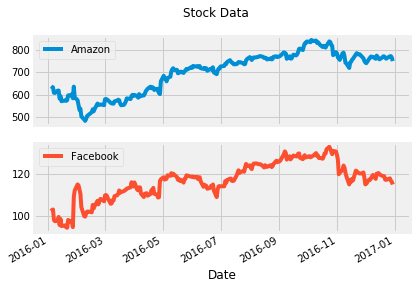

In [3]:
# visualize the stock_data
stock_data.plot(subplots=True, title='Stock Data')

# summarize the stock_data
print(stock_data.describe())
plt.show()


## 4. Visualize & summarize daily values for the S&P 500
<p>At glimpse, though both stocks have incremental tedency Amazon stocks seem to be way higher than Facebook stocks. Now we are going to do the same proccess in the S&P 500 Benchmark. We should consider the "Benchmark" as standard/a reference point for our evaluation.</p>

           S&P 500
count   252.000000
mean   2094.651310
std     101.427615
min    1829.080000
25%    2047.060000
50%    2104.105000
75%    2169.075000
max    2271.720000


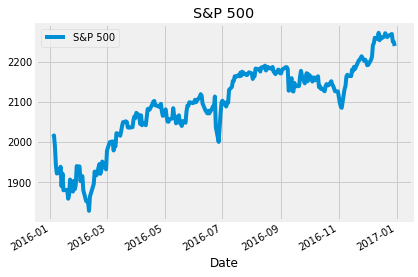

In [4]:
# plot the benchmark_data
benchmark_data.plot(title='S&P 500')

# summarize the benchmark_data
print(benchmark_data.describe())
plt.show()

## 5. Defining Sharpe Ratio: Starting with Daily Stock Returns
<p>The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration and is mathematically expressed with the following formula:</p>
<p>$$S=\frac{Expected\ Return\ of\ Portfolio - Risk\ Free\ Rate}{Portofolio\ Standard\ Deviation} \equiv \frac{{\bar{R}_p} - {R_f}}{{\sigma}_p}$$
<p>However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?</p>

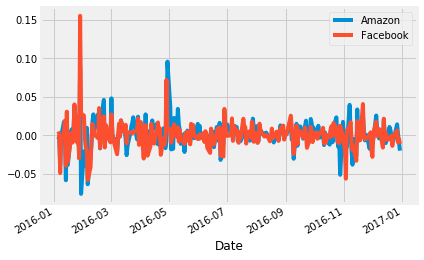

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


In [5]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()
plt.show()
# summarize the daily returns
stock_returns.describe()

## 6. Daily S&P 500 returns
<p>The return for both stocks follow a similiar pattern, re-ensuring the rather obvious that there is not an absolute best choice between two similar "objects" in comparison. This encompasses the risk of financial choices for the rational individual. Now we do the same for the S&amp;P 500 Benchmarck, calculating daily returns and plotting the output only this time formating them into a pandas.Series. </p>

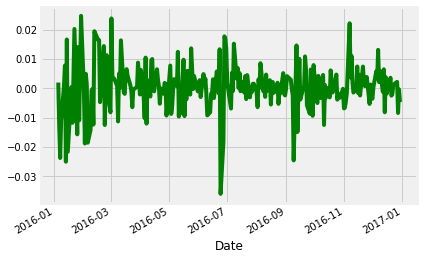

In [6]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot(c='green')
plt.show()
# summarize the daily returns
# ... YOUR CODE FOR TASK 6 HERE ...


## 7. Calculating Excess Returns for Amazon and Facebook vs. S&P 500
<p>Next, we need to calculate the relative performance of stocks vs. the S&amp;P 500 benchmark (that is the "excess returns"). This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.</p>

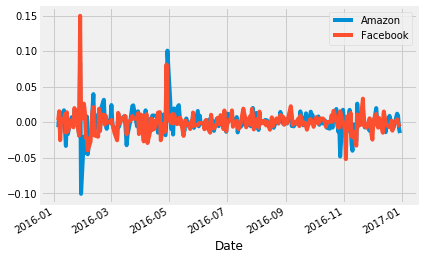

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


In [7]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot()
plt.show()
# summarize the excess_returns
excess_returns.describe()

## 8. The Average Difference in Daily Returns Stocks vs S&P 500
<p>Now we can finally start computing the Sharpe Ratio. First we need to calculate the average (expected value) of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the benchmark.</p>

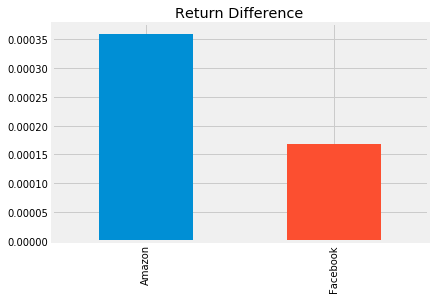

In [8]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean(axis=0, skipna=True)

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Return Difference')
plt.show()

## 9. Standard Deviation of the Return Difference
<p>It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.</p>
<p>Next, we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500. This is also known as the "volatility" of stocks</p>

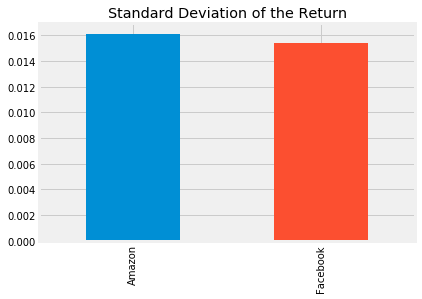

In [9]:
# calculate the standard deviations
sd_excess_return = excess_returns.std(axis=0, skipna=True)

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return')
plt.show()

## 10. Finally: The Sharpe Ratio itself. Show us those numbers
<p>Now we just need to compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <em>Sharpe ratio</em>, in a daily basis, and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.</p>
<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

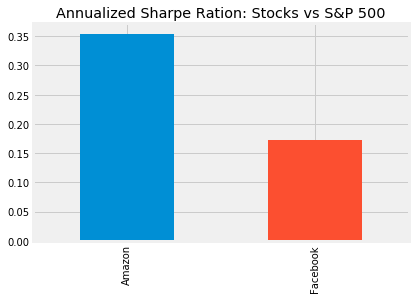

In [10]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ration: Stocks vs S&P 500')
plt.show()

## 11. Conclusion
<p>Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&amp;P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.</p>
<p>This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon. </p>
<p>When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.</p>
<p>**DISCLAIMER:** The analysis been made in this mini-project intends in showcasing the Sharpe Ratio and the capabalities of pandas library and SHOULD NOT be considered  either as an investement guide or an exhortation into financial choices/strategies. One should study more theories like <em>Portfolio Risk Theory</em> and be actively engaged in Financial Exchange, so as always procced at your own risk .